In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [32]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('data/data2.csv')

In [4]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,-0.513732,0.763754,0.445604,-2.095887,0.495256,0.335663,-0.589064,0.462052,0.210999,-0.660139,0.733688,1
1,0.809158,-0.576434,0.096532,-0.286944,-1.715869,-0.968514,1.517192,-1.518776,-0.855455,0.360755,-1.631176,0
2,0.842894,-0.051000,-0.024118,-0.096505,1.868475,2.008814,1.408631,-0.666950,-0.738620,-0.953518,-1.560544,0
3,-1.617784,0.324487,0.090361,-1.341070,0.080995,-1.870025,-0.018284,-0.587191,-0.965779,0.355870,0.828380,1
4,-0.068445,0.440448,-1.385590,-1.436115,-0.855923,-0.688641,1.766045,-1.347749,-1.609041,-0.213923,-1.390606,0


In [5]:
y = df.y.values
X = df.drop(['y'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
ks = [5, 25, 50, 75, 100, 200, 250, 500, 750, 1000]
params = {'weights': ('uniform', 'distance'), 'n_neighbors': ks}
knn = KNeighborsClassifier()
clf_knn = GridSearchCV(knn, params, cv=10)
clf_knn.fit(X, y)
print(clf_knn.best_params_)

{'n_neighbors': 100, 'weights': 'distance'}


In [54]:
clf_knn.best_score_

0.914

In [60]:
parameter_grid = {'criterion': ('gini', 'entropy'),
                  'max_depth': list(range(1, 15))}
dt = DecisionTreeClassifier()
clf_dt = GridSearchCV(dt, param_grid = parameter_grid, cv = 10)
clf_dt.fit(X, y)
print(clf_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 3}


In [56]:
clf_dt.best_score_

0.914

In [71]:
parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=1)], 
              'n_estimators': [1,2,3,4,5,10,15,20,25,30,45,50,75,100], 
              'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 1]}
ada = AdaBoostClassifier()
clf_ada = GridSearchCV(ada, parameters, cv = 10)
clf_ada.fit(X, y)
print(clf_ada.best_params_)

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 0.5, 'n_estimators': 30}


In [64]:
clf_ada.best_score_

0.924

In [16]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 5, 10, 25]}]
sv = SVC()
clf_svm = GridSearchCV(sv, param_grid=tuned_parameters, cv=10)
clf_svm.fit(X, y)
print(clf_svm.best_params_)

{'C': 1, 'kernel': 'linear'}


In [17]:
clf_svm.best_score_

0.9193333333333333

In [29]:
parameters = {'max_iter': [750], 'solver': ['adam', 'lbfgs'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes': [(20,), (25,), (30,)]}
clf_nn = GridSearchCV(MLPClassifier(), parameters, cv=10)
clf_nn.fit(X, y)
print(clf_nn.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (25,), 'max_iter': 750, 'solver': 'adam'}


In [31]:
clf_nn.best_score_

0.9213333333333333

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

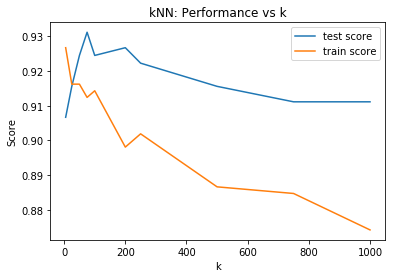

In [59]:
ks = [5, 25, 50, 75, 100, 200, 250, 500, 750, 1000]
train_score = [0] * len(ks)
test_score = [0] * len(ks)

for i, k in enumerate(ks):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(x_train, y_train)

    train_score[i] = clf.score(x_train, y_train)
    test_score[i] = clf.score(x_test, y_test)

# Plot results
plt.figure()
plt.title('kNN: Performance vs k')
plt.plot(ks, test_score, '-', label='test score')
plt.plot(ks, train_score, '-', label='train score')
plt.legend()
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

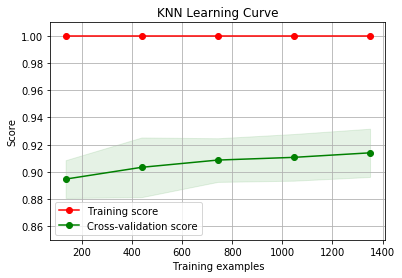

In [57]:
title = "KNN Learning Curve"
cv = StratifiedKFold(n_splits=10)
estimator = KNeighborsClassifier(n_neighbors=100, weights='distance')
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

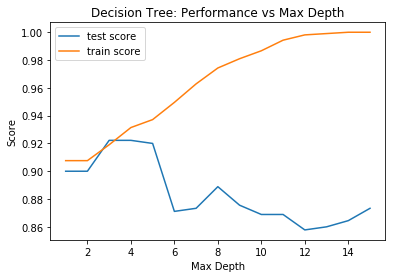

In [61]:
depths = range(1, 16)
train_score = [0] * len(depths)
test_score = [0] * len(depths)

for i, d in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    clf = clf.fit(x_train, y_train)

    train_score[i] = clf.score(x_train, y_train)
    test_score[i] = clf.score(x_test, y_test)

# Plot results
plt.figure()
plt.title('Decision Tree: Performance vs Max Depth')
plt.plot(depths, test_score, '-', label='test score')
plt.plot(depths, train_score, '-', label='train score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

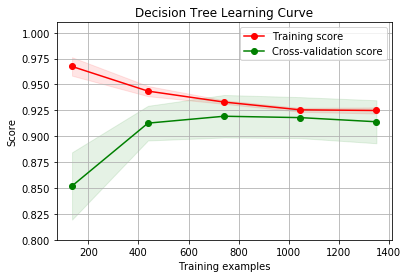

In [58]:
title = "Decision Tree Learning Curve"
cv = StratifiedKFold(n_splits=10)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_learning_curve(estimator, title, X, y, ylim=(0.80, 1.01), cv=cv, n_jobs=4)

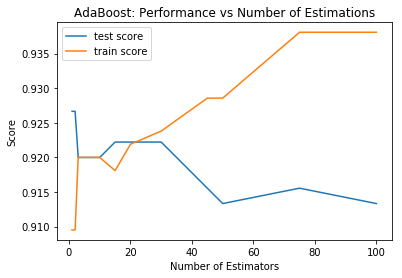

In [99]:
ns = [1,2,3,4,5,10,15,20,25,30,45,50,75,100]
train_score = [0] * len(ns)
test_score = [0] * len(ns)

for i, n in enumerate(ns):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, learning_rate=0.5)
    clf = clf.fit(x_train, y_train)

    train_score[i] = clf.score(x_train, y_train)
    test_score[i] = clf.score(x_test, y_test)

# Plot results
plt.figure()
plt.title('AdaBoost: Performance vs Number of Estimations')
plt.plot(ns, test_score, '-', label='test score')
plt.plot(ns, train_score, '-', label='train score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.show()

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

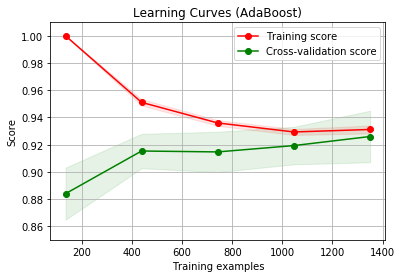

In [100]:
title = "Learning Curves (AdaBoost)"
cv = StratifiedKFold(n_splits=10)
estimator = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5)
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

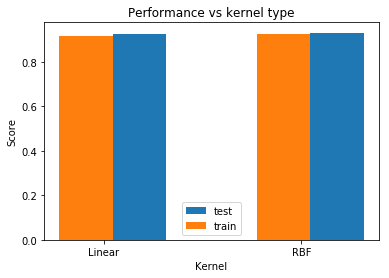

In [77]:
kernels = ['linear', 'rbf']
train_score = [0] * len(kernels)
test_score = [0] * len(kernels)

for i, k in enumerate(kernels):
    if k == 'linear':
        clf = SVC(C=1, kernel=k)
    else:
        clf = SVC(C=1000, gamma=0.001, kernel=k)
    clf = clf.fit(x_train, y_train)

    train_score[i] = clf.score(x_train, y_train)
    test_score[i] = clf.score(x_test, y_test)

N = 2

ind = np.arange(N) 
width = 0.27
plt.bar(ind + width, test_score, width,
    label='test')
plt.bar(ind, train_score, width, label='train')

plt.ylabel('Score')
plt.xlabel('Kernel')
plt.title('Performance vs kernel type')

plt.xticks(ind + width / 3, ('Linear', 'RBF'))
plt.legend(loc='best')
plt.show()

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

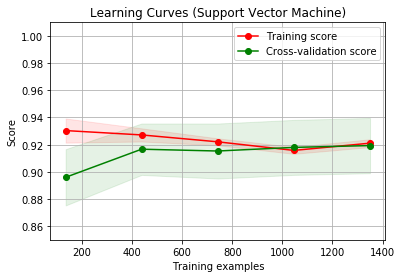

In [50]:
title = "Learning Curves (Support Vector Machine)"
cv = StratifiedKFold(n_splits=10)
estimator = SVC(C=1, kernel='linear')
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

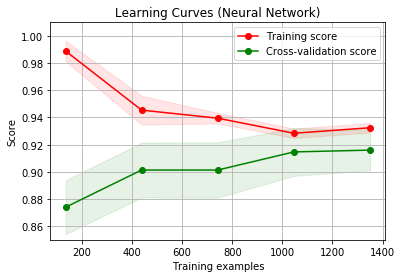

In [52]:
title = "Learning Curves (Neural Network)"
cv = StratifiedKFold(n_splits=10)
estimator = MLPClassifier(max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=(25,))
plot_learning_curve(estimator, title, X, y, ylim=(0.85, 1.01), cv=cv, n_jobs=4)

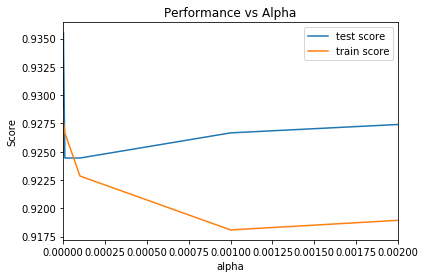

In [107]:
alphas = 10.0 ** -np.arange(1, 10)
train_score = [0] * len(alphas)
test_score = [0] * len(alphas)

for i, a in enumerate(alphas):
    clf = MLPClassifier(alpha = a, hidden_layer_sizes = (25,), solver = 'adam', max_iter=1000)
    clf.fit(x_train, y_train)

    train_score[i] = clf.score(x_train, y_train)
    test_score[i] = clf.score(x_test, y_test)

# Plot results
plt.figure()
plt.title('Performance vs Alpha')
plt.plot(alphas, test_score, '-', label='test score')
plt.plot(alphas, train_score, '-', label='train score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xlim(left=0, right = 0.002)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

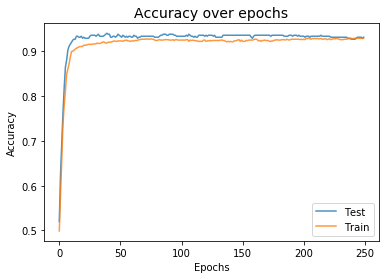

In [95]:
X_train, X_test = x_train.values, x_test.values
mlp = MLPClassifier(alpha = 1e-3, hidden_layer_sizes = (30,), solver = 'adam')

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 250
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
#     print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(mlp.score(X_test, y_test))

    epoch += 1

""" Plot """
plt.plot(scores_test, alpha=0.8, label='Test')
plt.plot(scores_train, alpha=0.8, label='Train')
plt.title("Accuracy over epochs", fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.classes_, assume_unique=True):
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:927: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.setdiff1d(classes, self.class

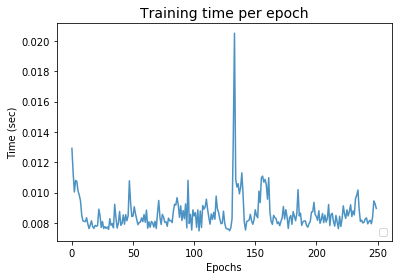

In [106]:
mlp = MLPClassifier(alpha = 1e-4, hidden_layer_sizes = (30,), solver = 'adam')

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 250
N_BATCH = 128
N_CLASSES = np.unique(y_train)

times = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    t0 = time.time()
    
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    t1 = time.time()
    dt = t1 - t0
    times.append(dt)

    epoch += 1

""" Plot """
plt.plot(times, alpha=0.8)
plt.title("Training time per epoch", fontsize=14)
plt.ylabel('Time (sec)')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()